# EDA of Training and Test Data

Author: Finian O'Neill
Purpose: Perform exploratory data analysis (EDA) on the input data.

### Setup

In [1]:
# Comprehensive EDA for Spaceship Titanic Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
# Set styling
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [3]:
# load in the EDA helpers
import app.eda_helpers as eda_helpers

### Data Load

In [4]:
# load train dataset
train_df = pd.read_csv('data/train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# load test dataset
test_df = pd.read_csv('data/test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### EDA Pipeline

In [12]:
# Main function to run the EDA pipeline
def run_eda_pipeline(df: pd.DataFrame):
    """Run the complete EDA pipeline"""
    print("Loading and examining data...")
    # df = load_and_examine_data(filepath)
    df = eda_helpers.load_and_examine_data(df=df)
    
    print("\nVisualizing missing data...")
    eda_helpers.visualize_missing_data(df)
    
    print("\nPerforming feature engineering...")
    df_processed = eda_helpers.feature_engineering(df)
    
    print("\nAnalyzing target variable...")
    eda_helpers.analyze_target(df_processed)
    
    print("\nAnalyzing categorical variables...")
    eda_helpers.analyze_categorical_vars(df_processed)
    
    print("\nAnalyzing numerical variables...")
    eda_helpers.analyze_numerical_vars(df_processed)
    
    print("\nAnalyzing correlations...")
    corr_matrix = eda_helpers.analyze_correlations(df_processed)
    print(corr_matrix.columns)
    print(corr_matrix.head())
    
    print("\nCreating pairplot for important features...")
    # Select features with highest correlation to target
    if 'Transported' in df_processed.columns and df_processed['Transported'].dtype in ['int64', 'float64', 'bool']:
        target_corrs = corr_matrix['Transported'].abs().sort_values(ascending=False)
        top_features = target_corrs[1:6].index.tolist()  # Skip target itself
        eda_helpers.plot_pairplot(df_processed, features=top_features)
    
    print("\nAnalyzing bivariate relationships...")
    eda_helpers.analyze_bivariate_relationships(df_processed)
    
    print("\nAnalyzing spending patterns...")
    eda_helpers.analyze_spending_patterns(df_processed)
    
    print("\nAnalyzing group travel patterns...")
    eda_helpers.analyze_group_patterns(df_processed)
    
    print("\nEDA completed successfully!")
    return df_processed

Loading and examining data...
Dataset Shape: (8693, 14)

First 5 rows:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  

<Figure size 1200x600 with 0 Axes>

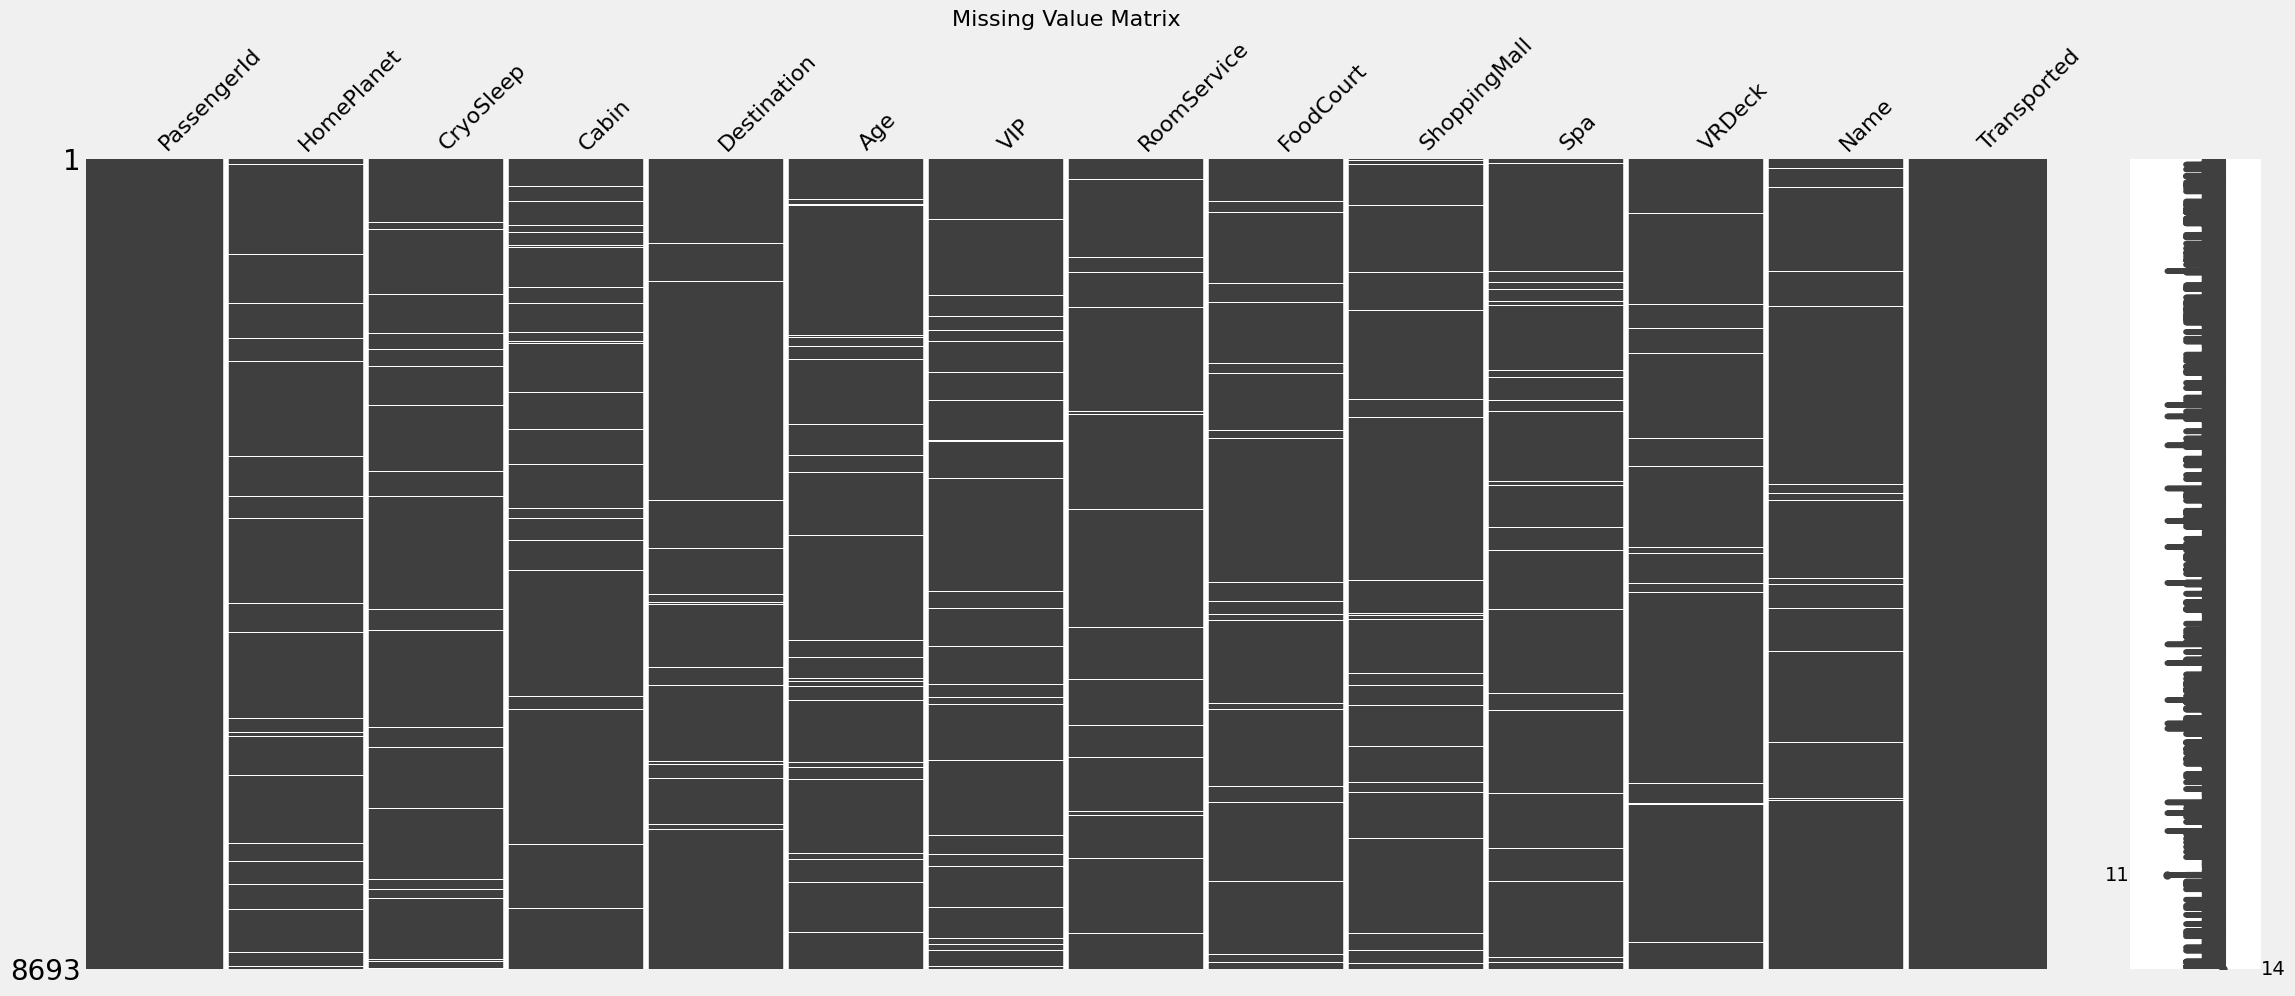

<Figure size 1200x600 with 0 Axes>

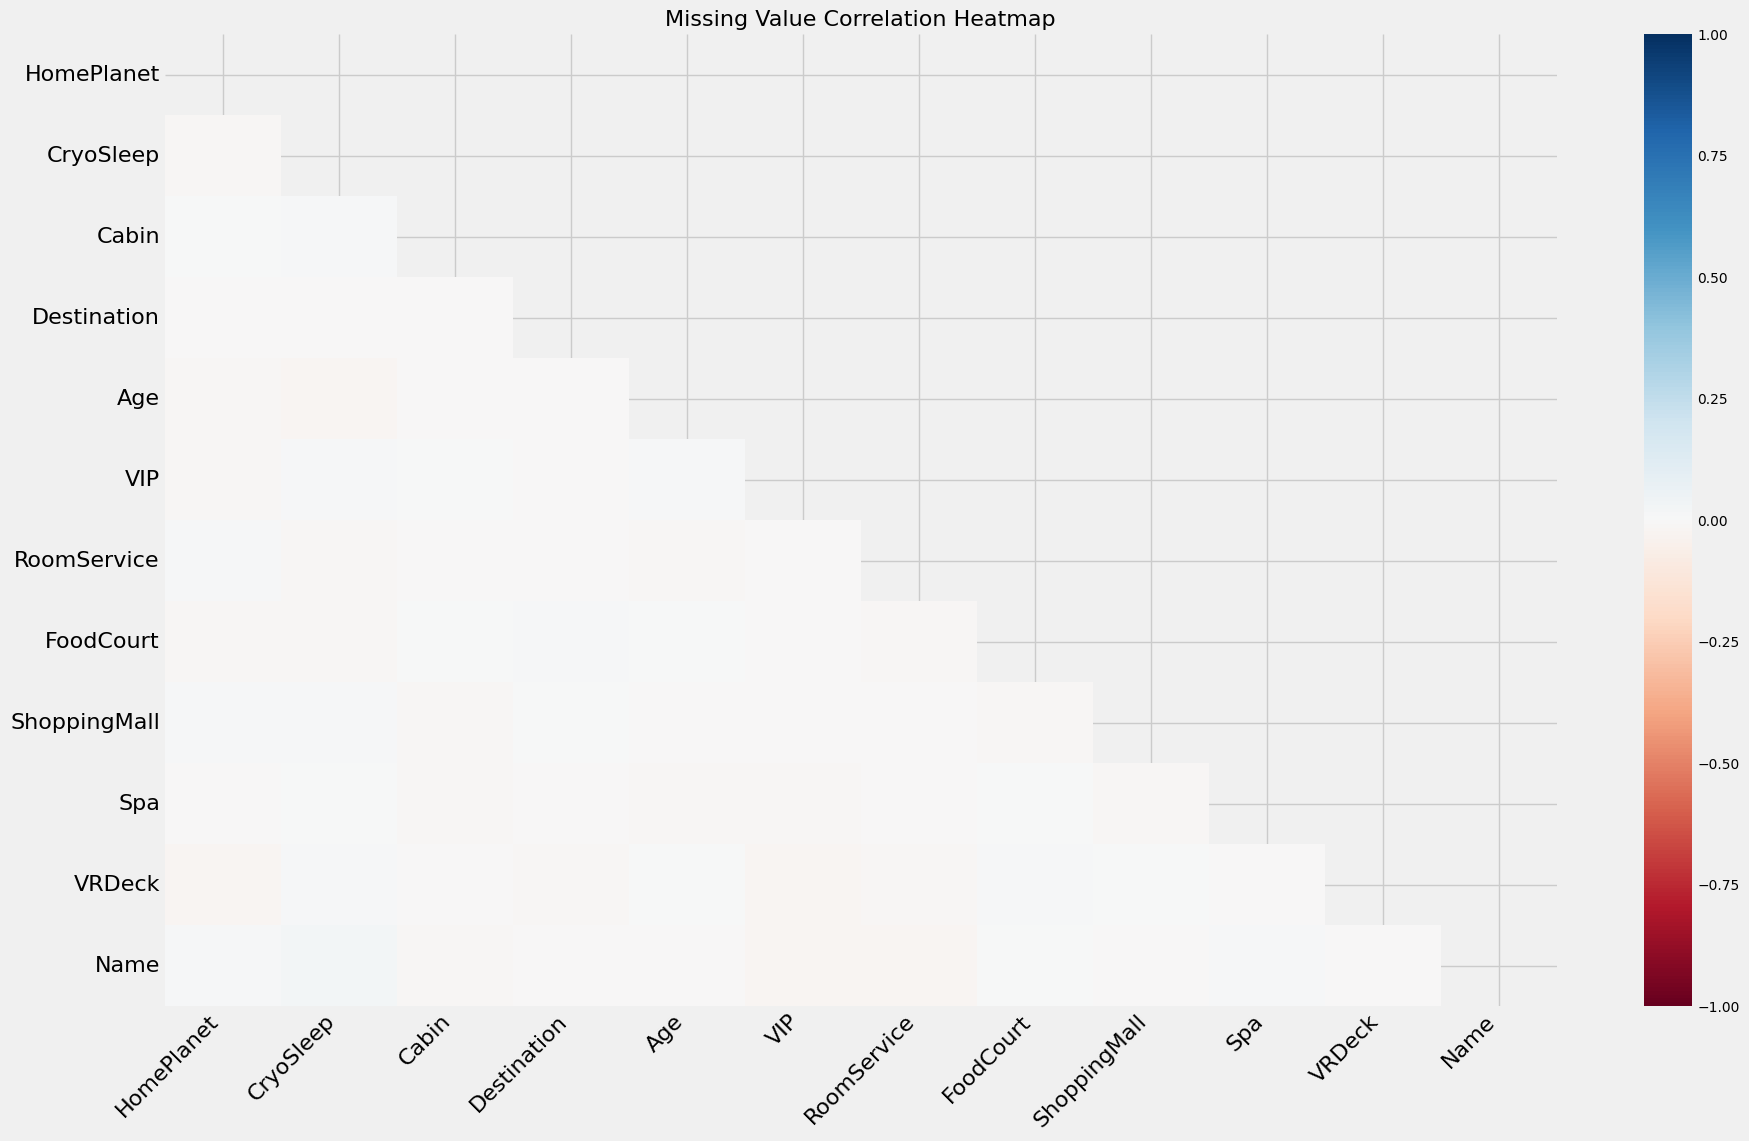


Performing feature engineering...

Analyzing target variable...


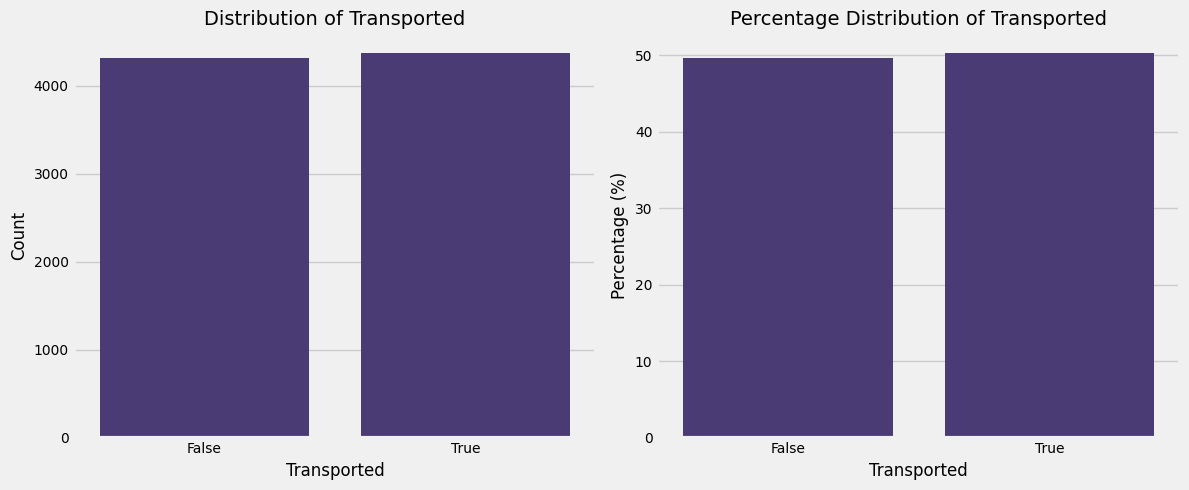


Analyzing categorical variables...


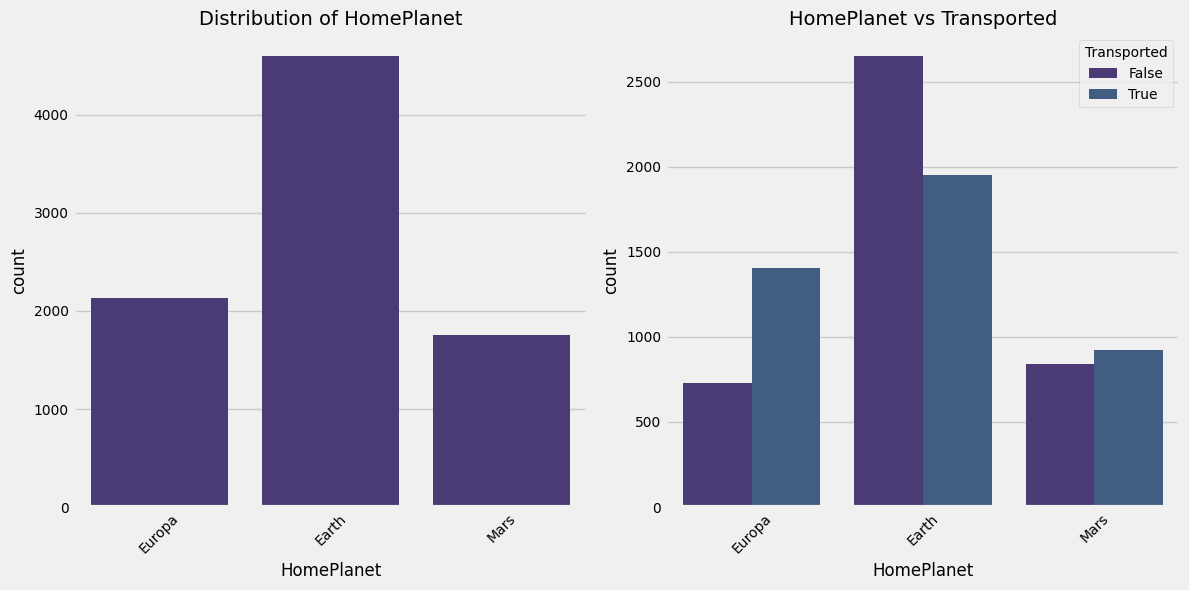

<Figure size 1000x500 with 0 Axes>

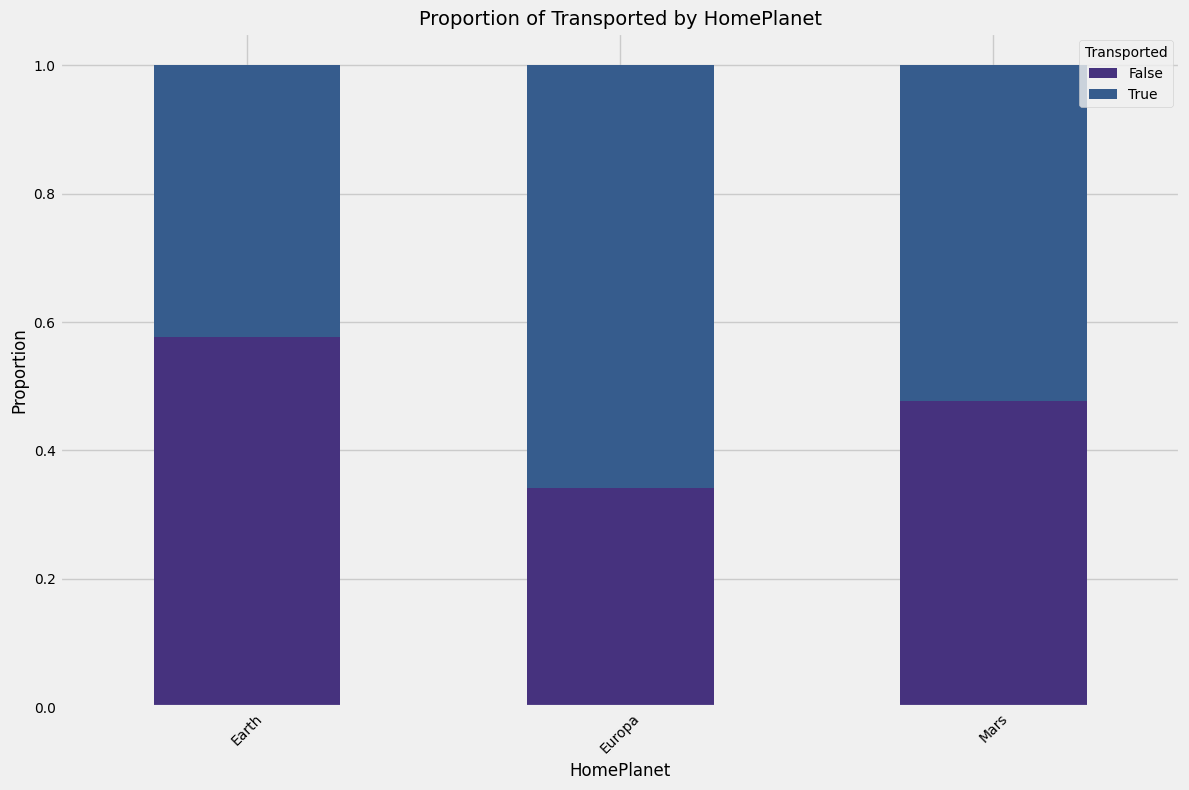

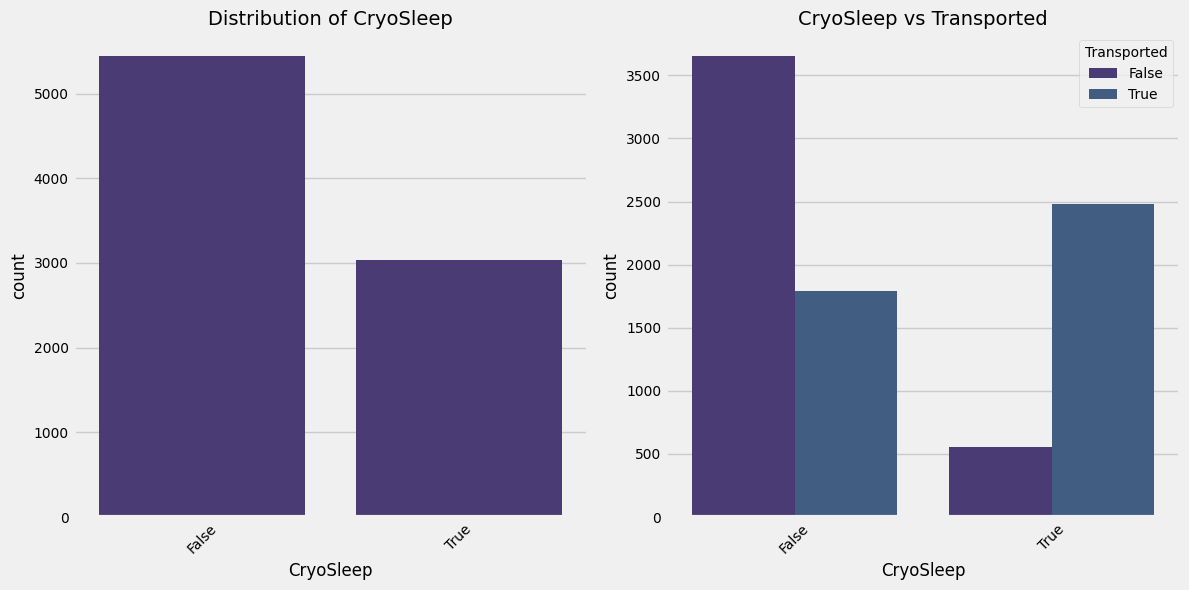

<Figure size 1000x500 with 0 Axes>

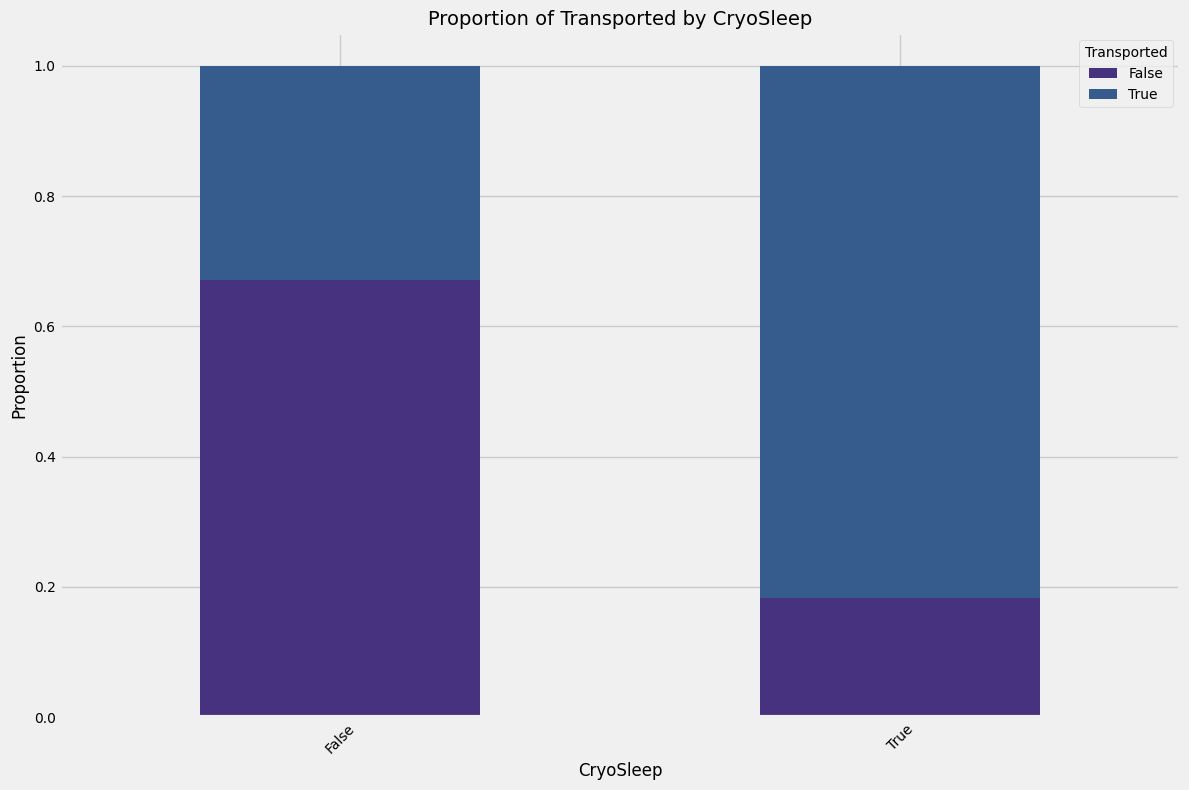

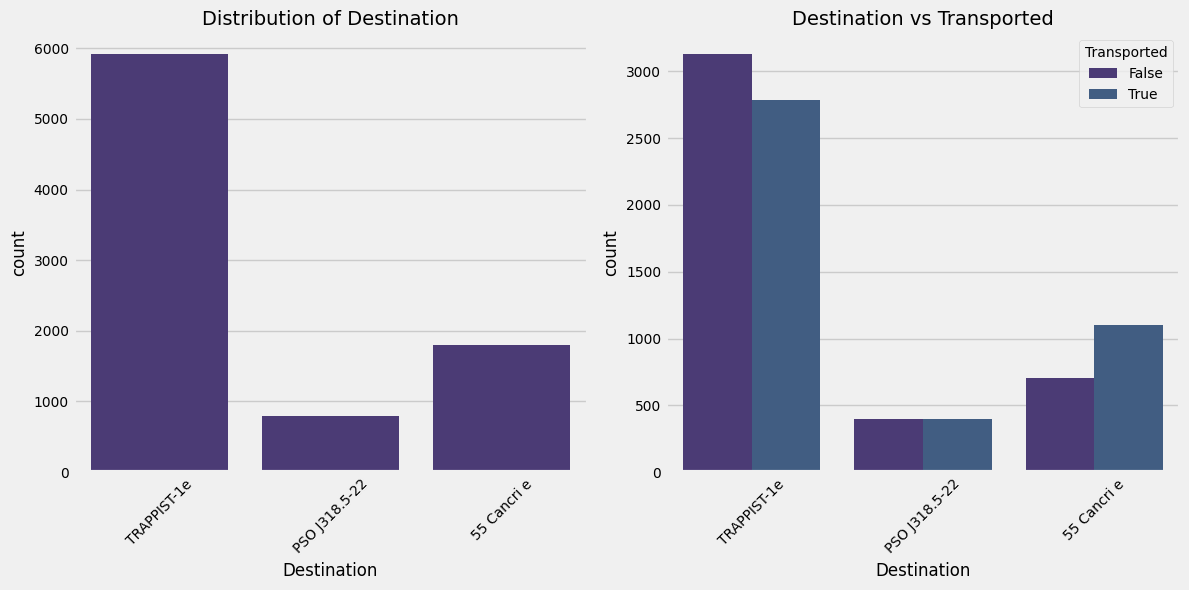

<Figure size 1000x500 with 0 Axes>

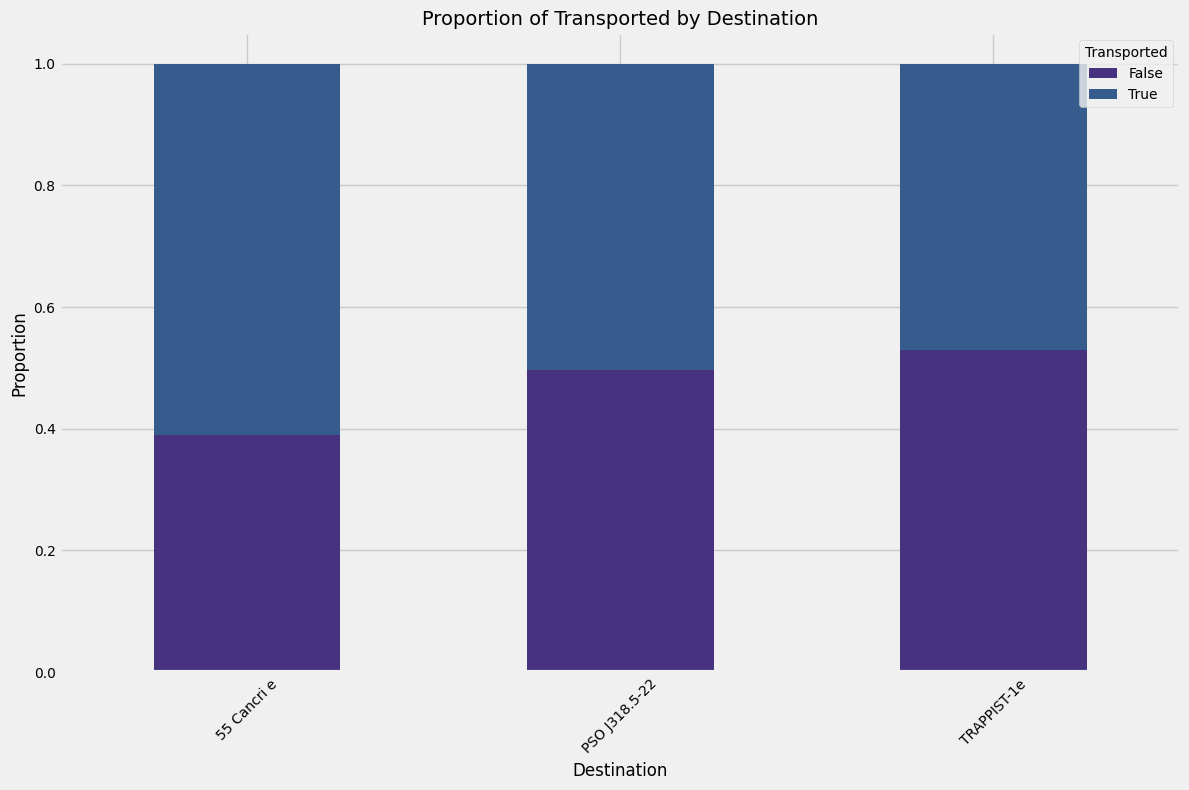

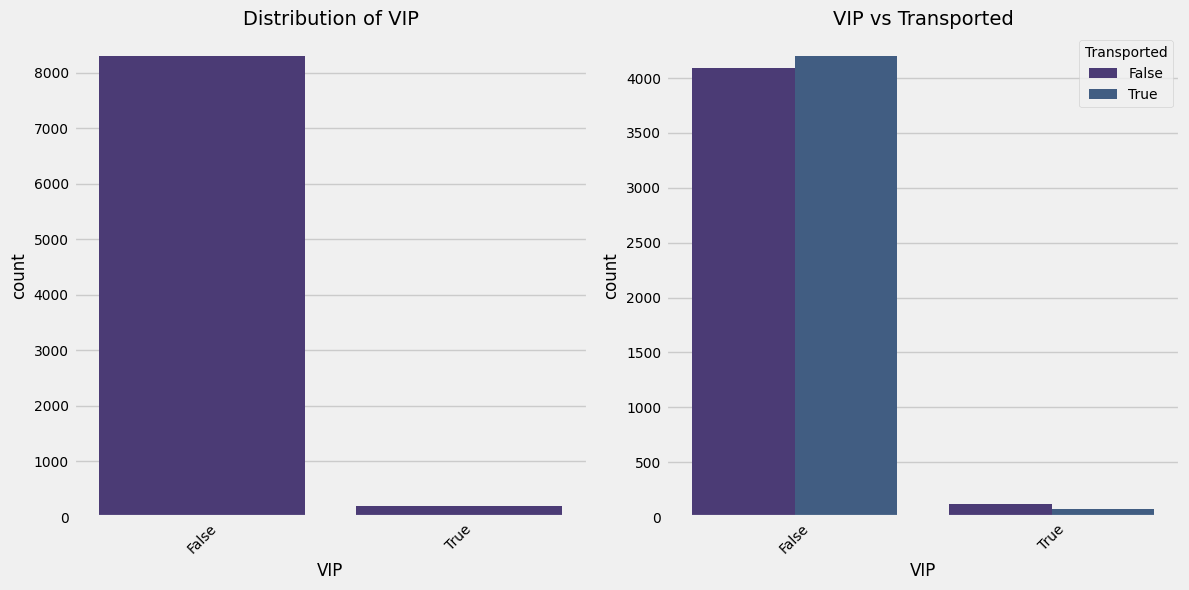

<Figure size 1000x500 with 0 Axes>

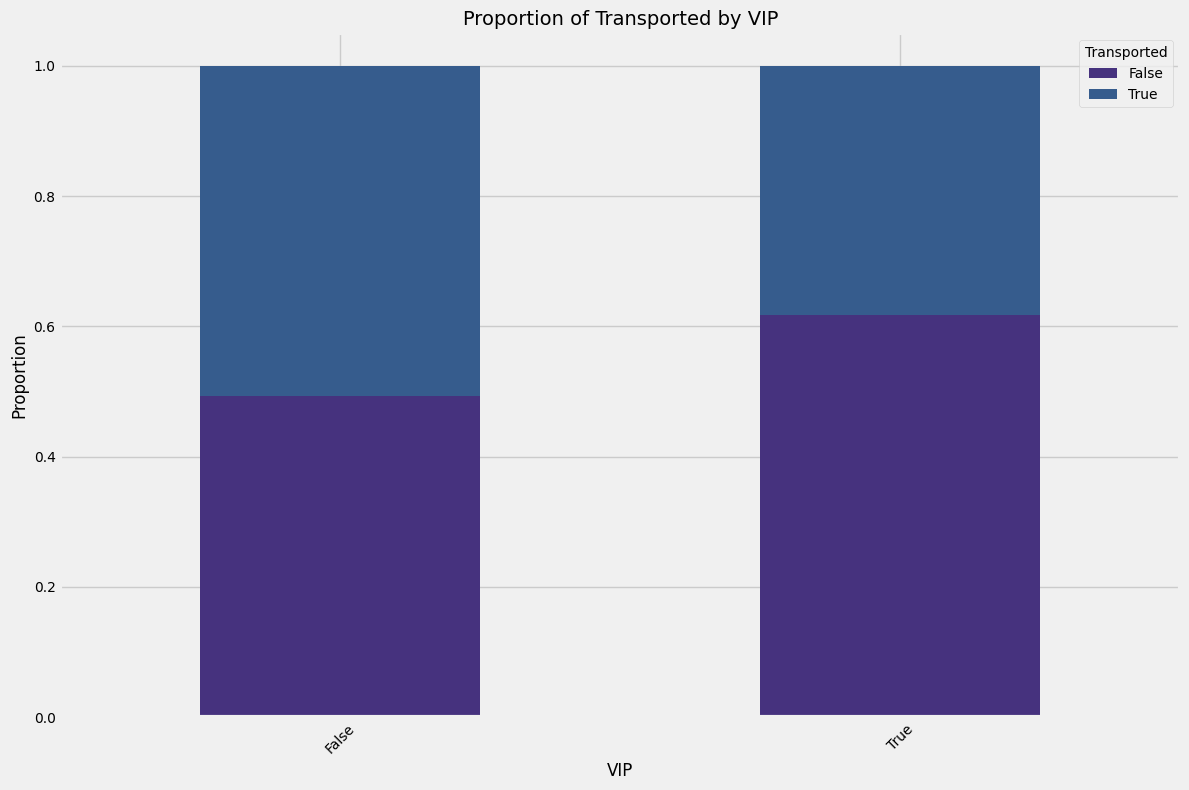

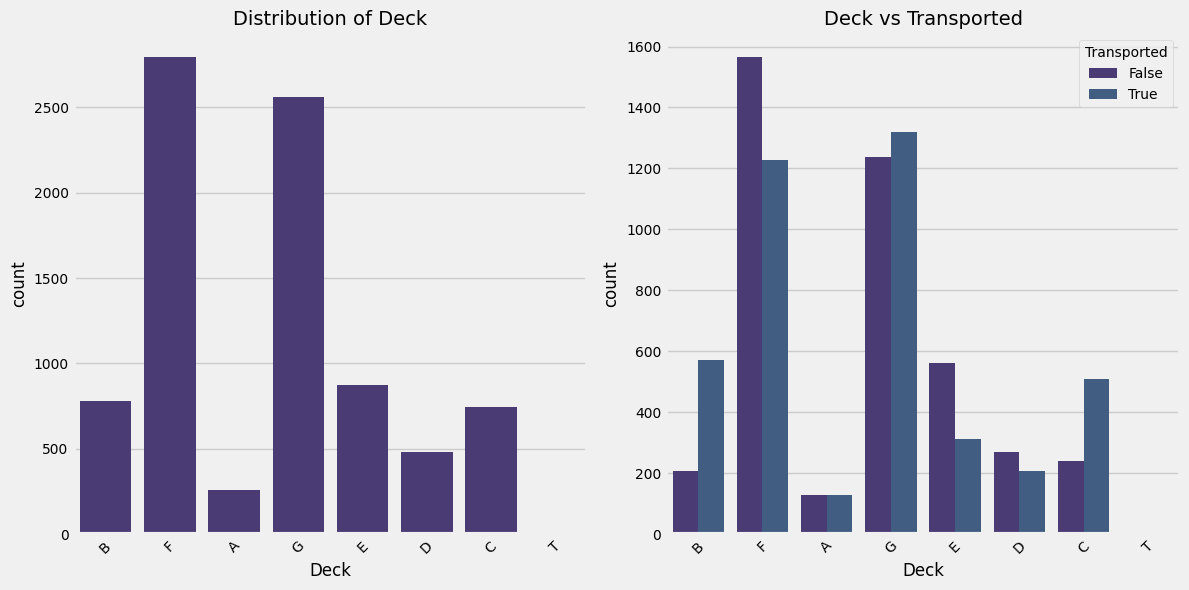

<Figure size 1000x500 with 0 Axes>

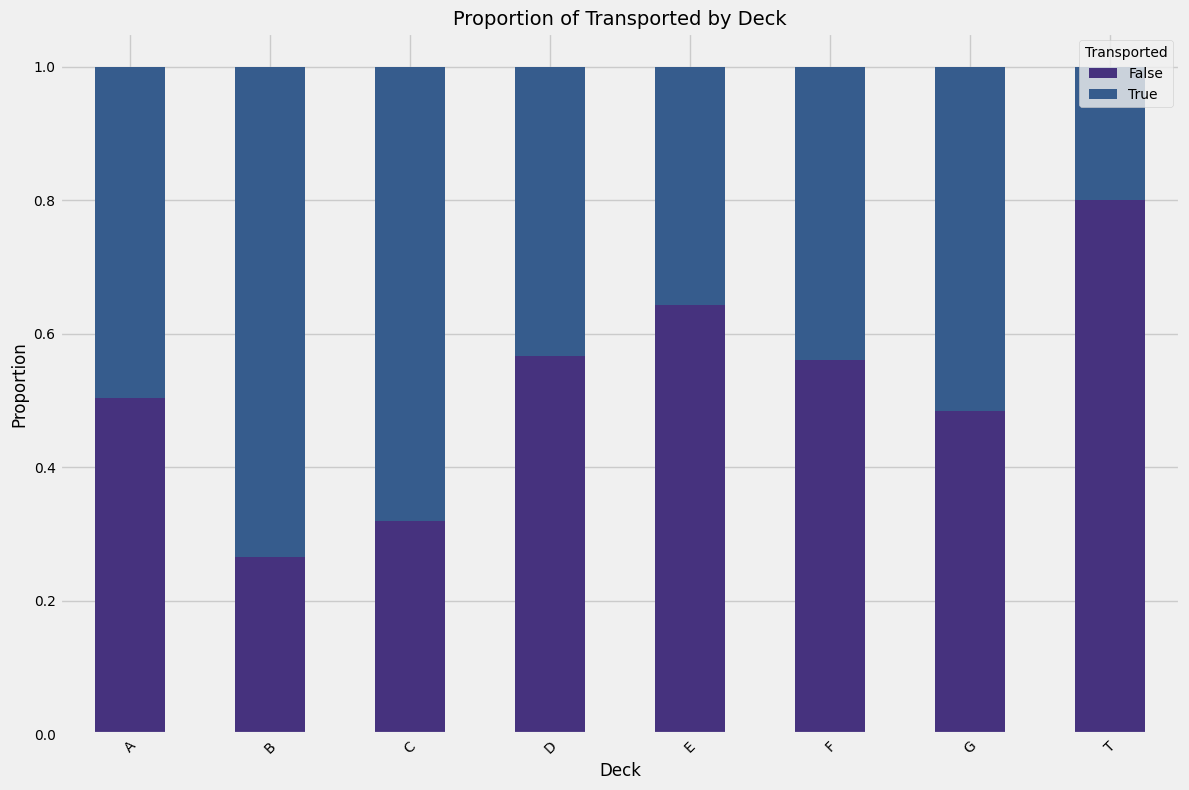

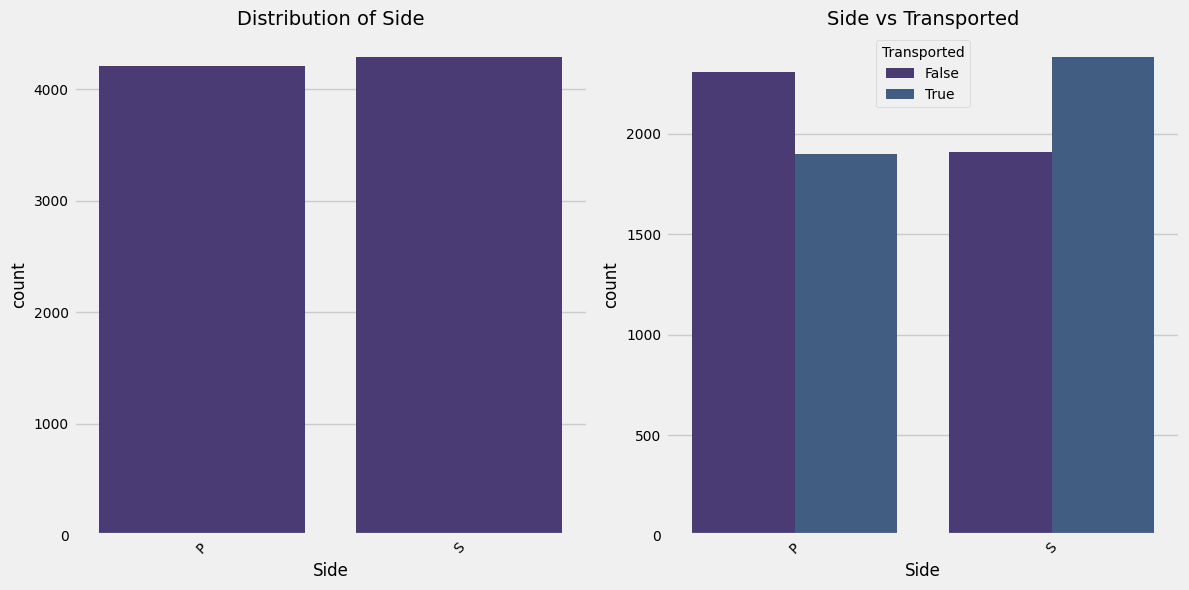

<Figure size 1000x500 with 0 Axes>

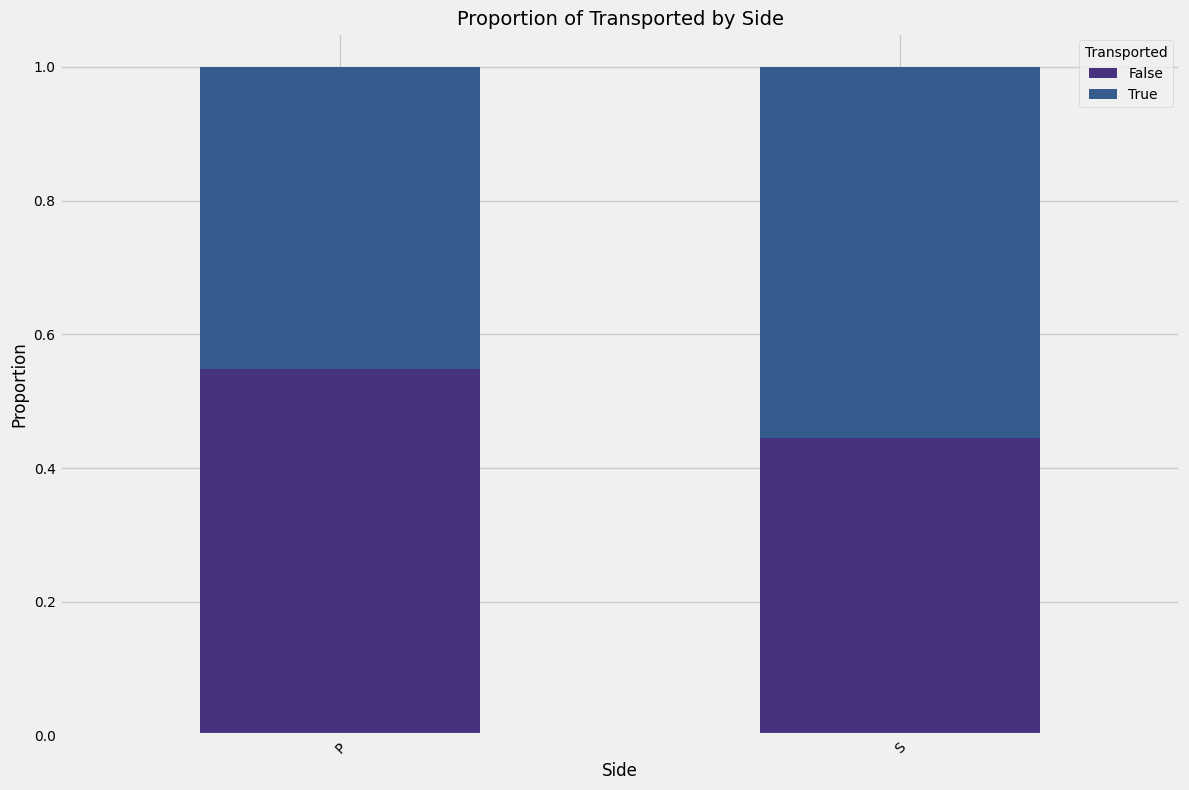


Analyzing numerical variables...


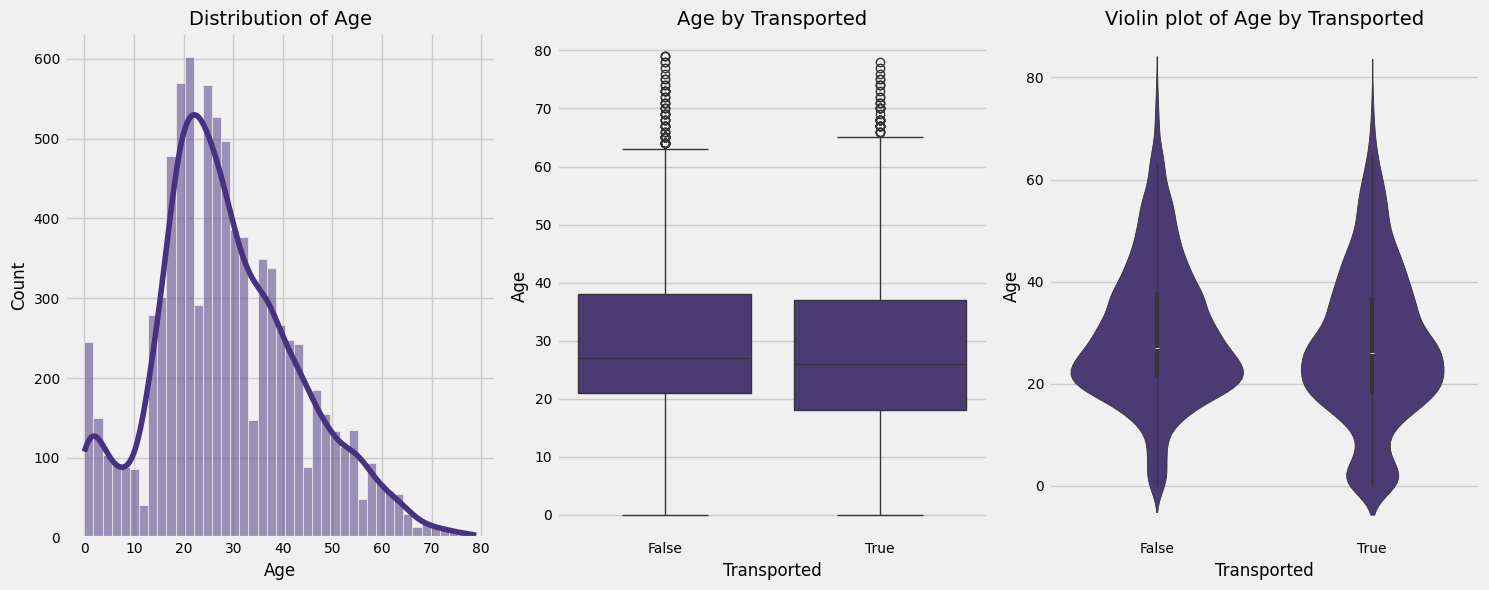

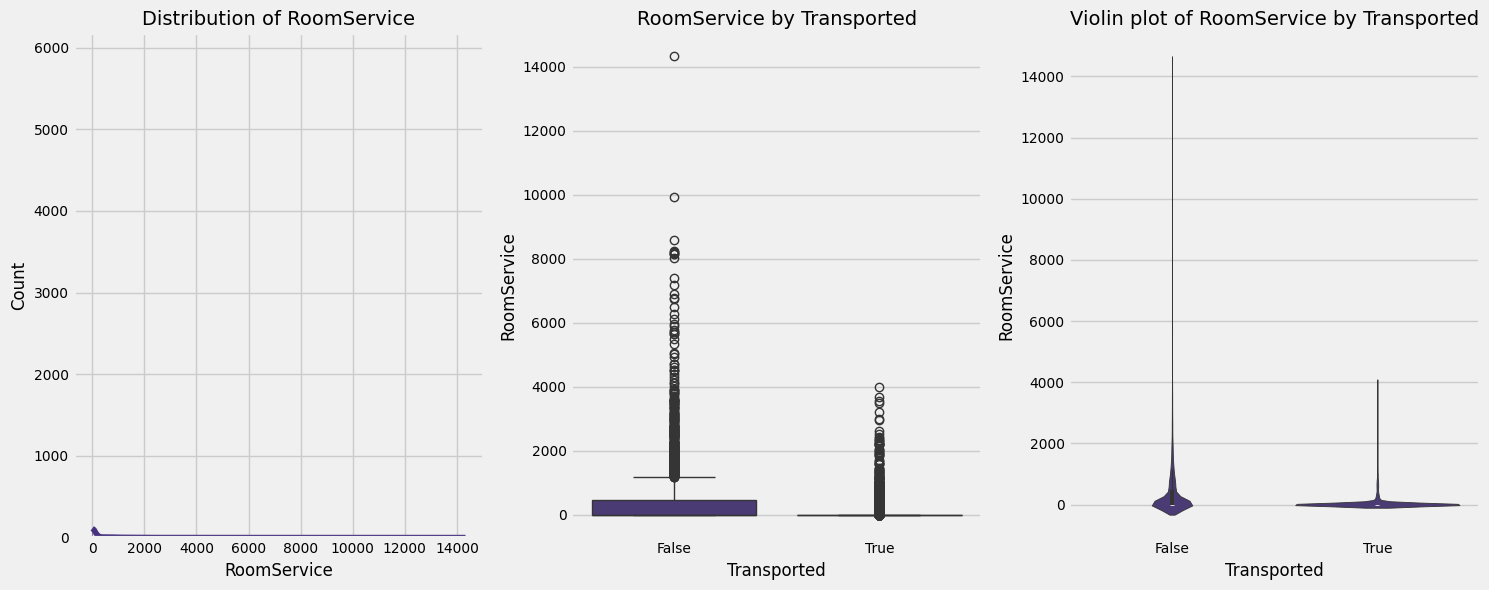

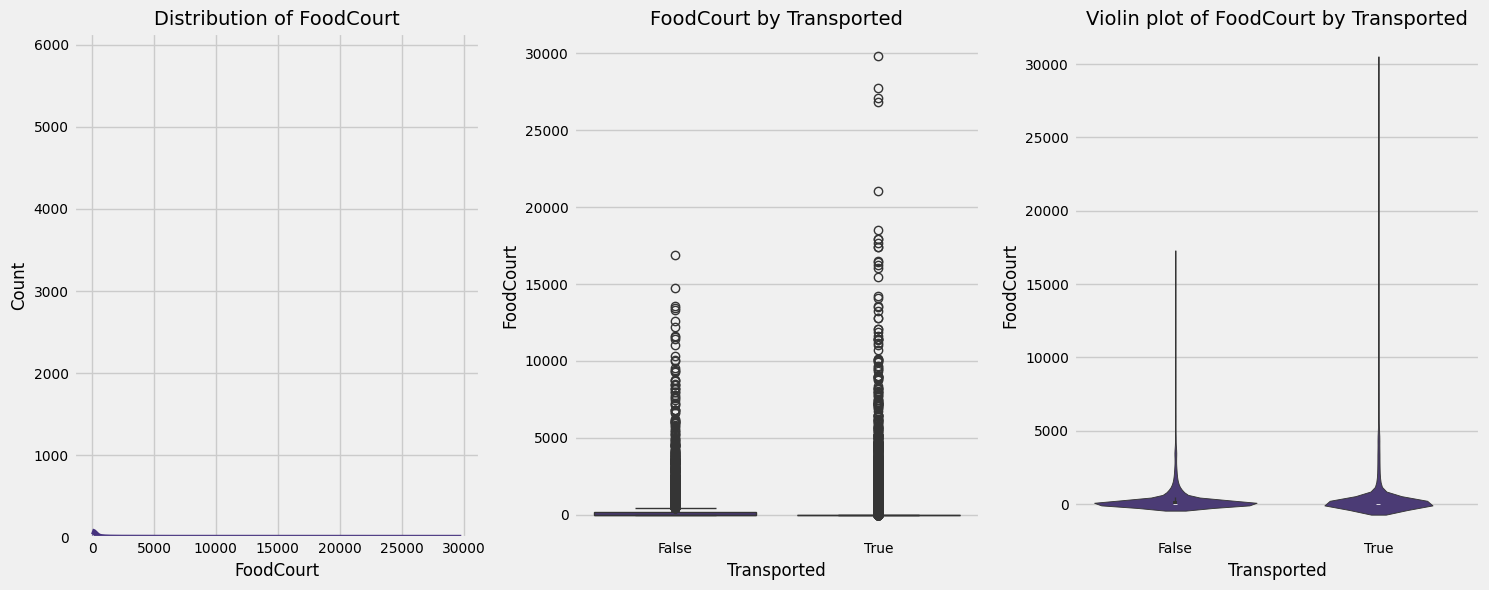

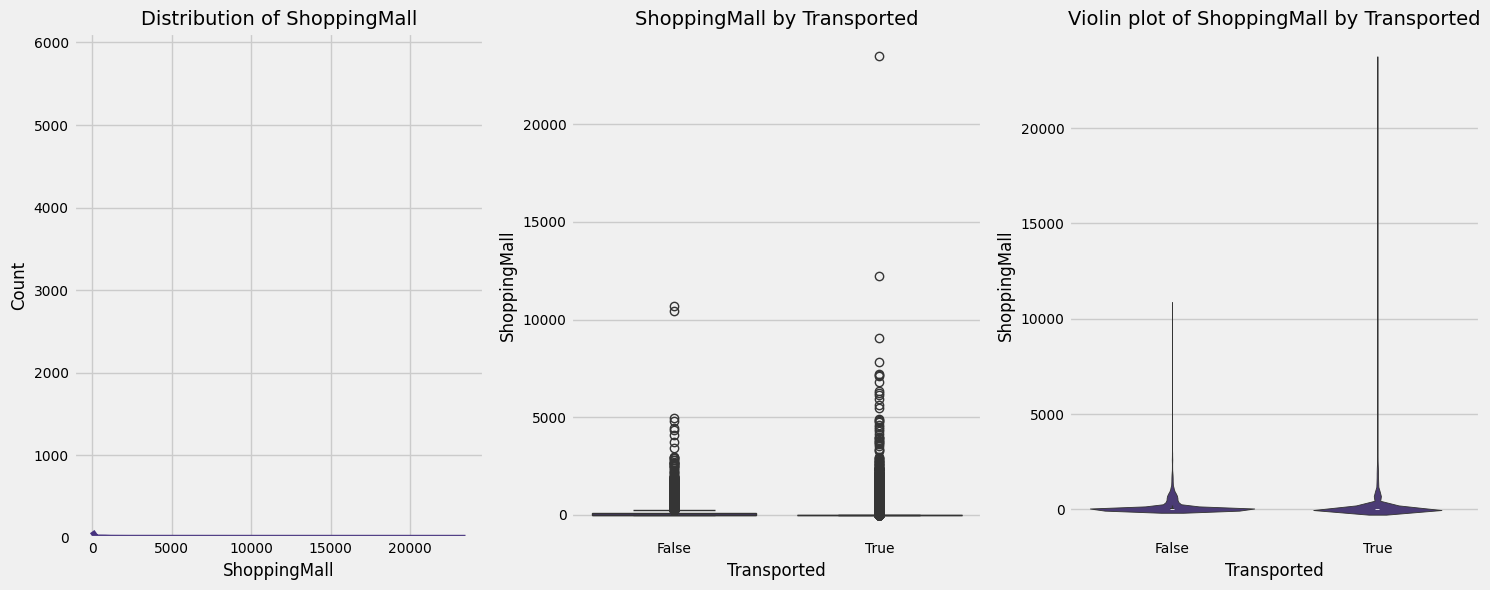

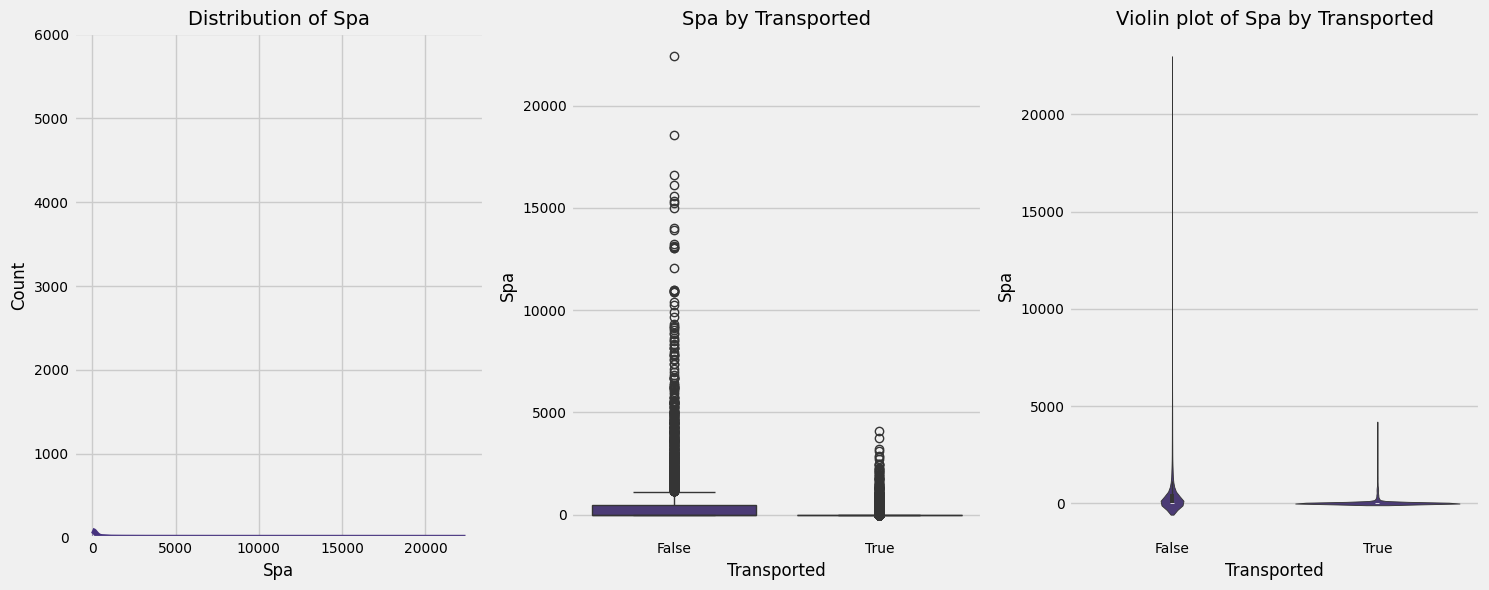

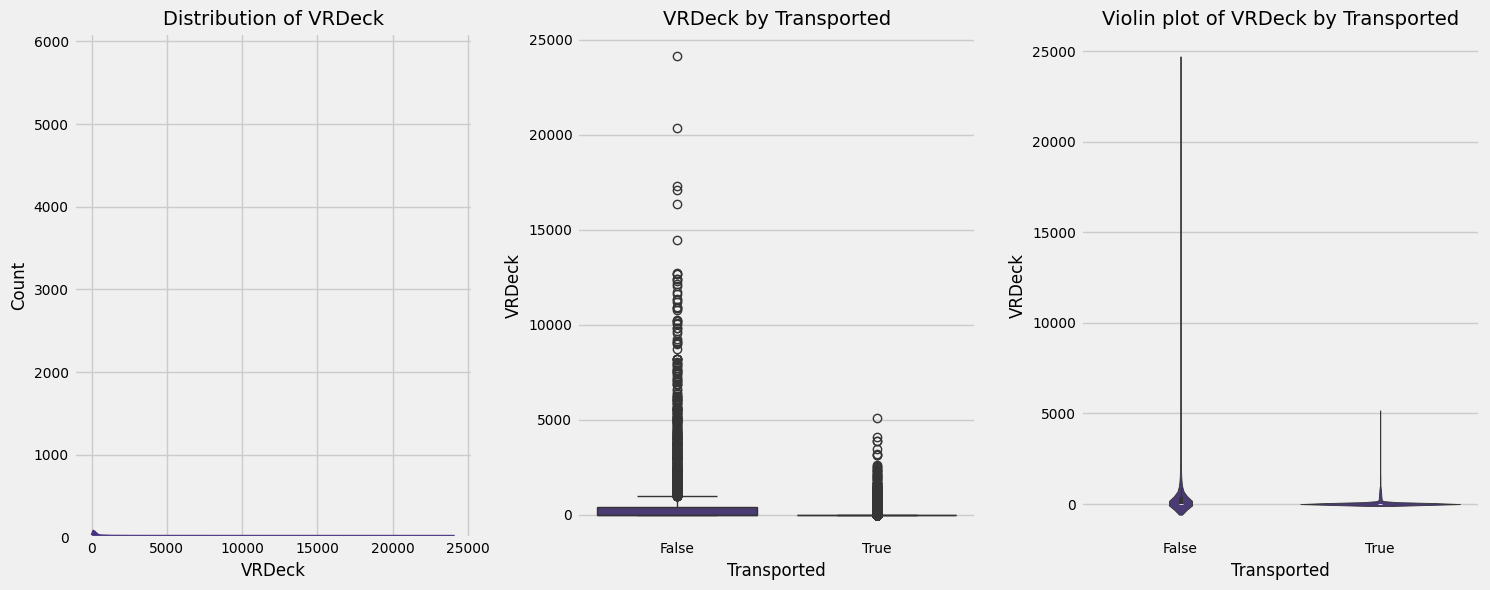

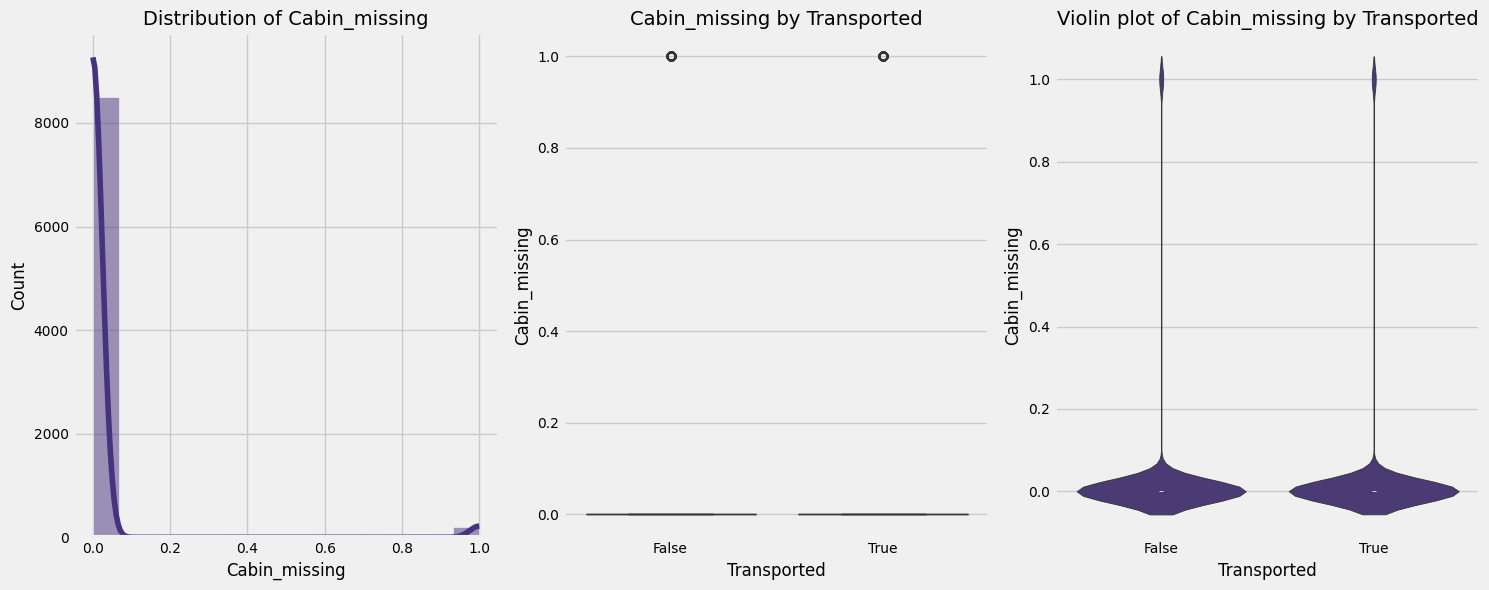

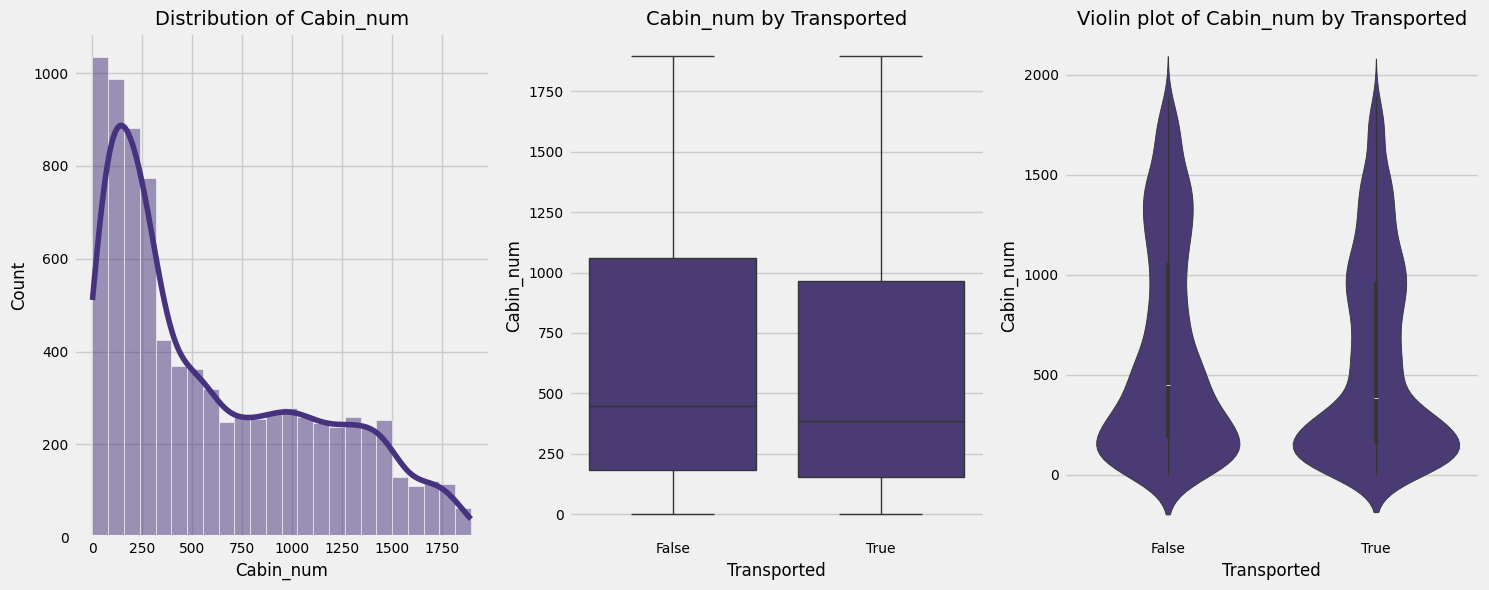

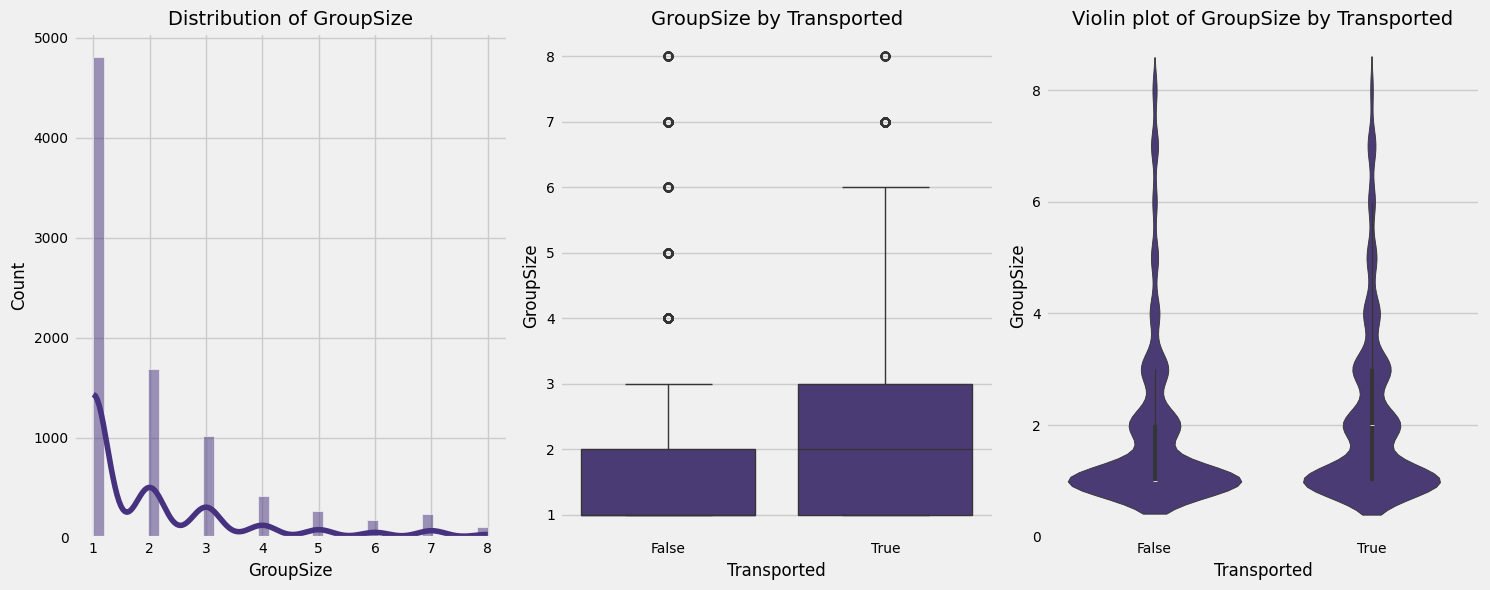

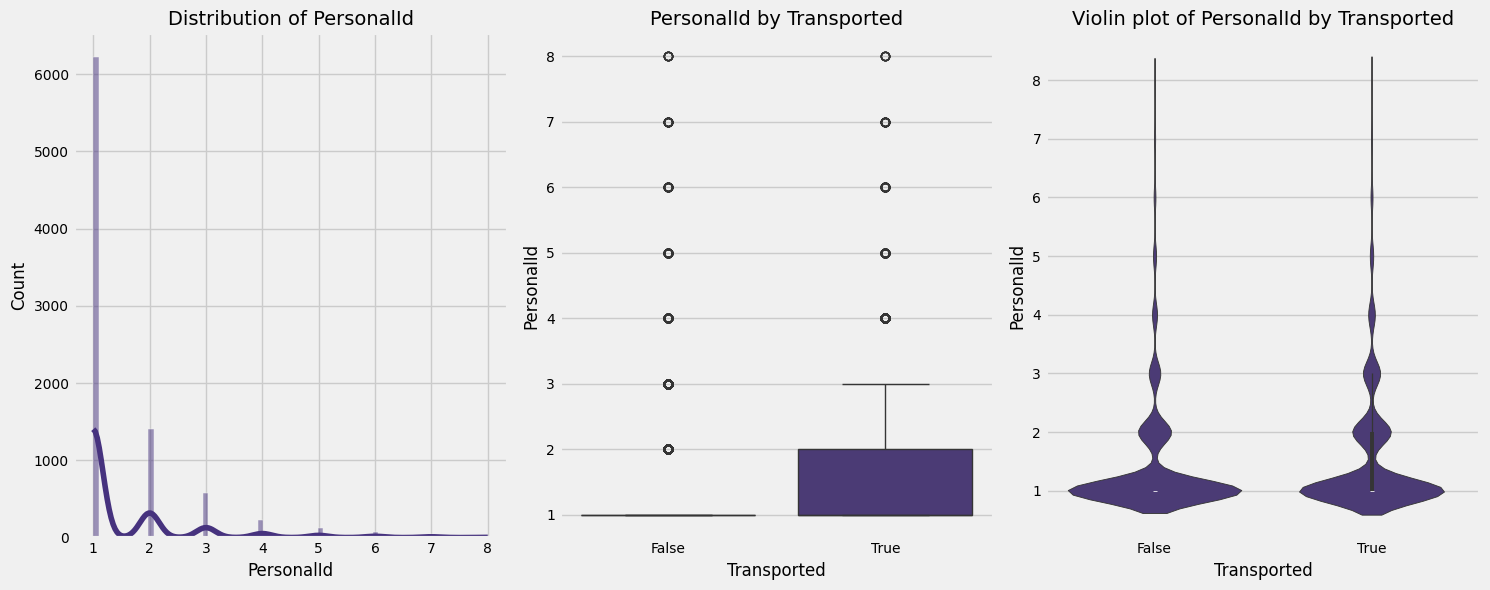

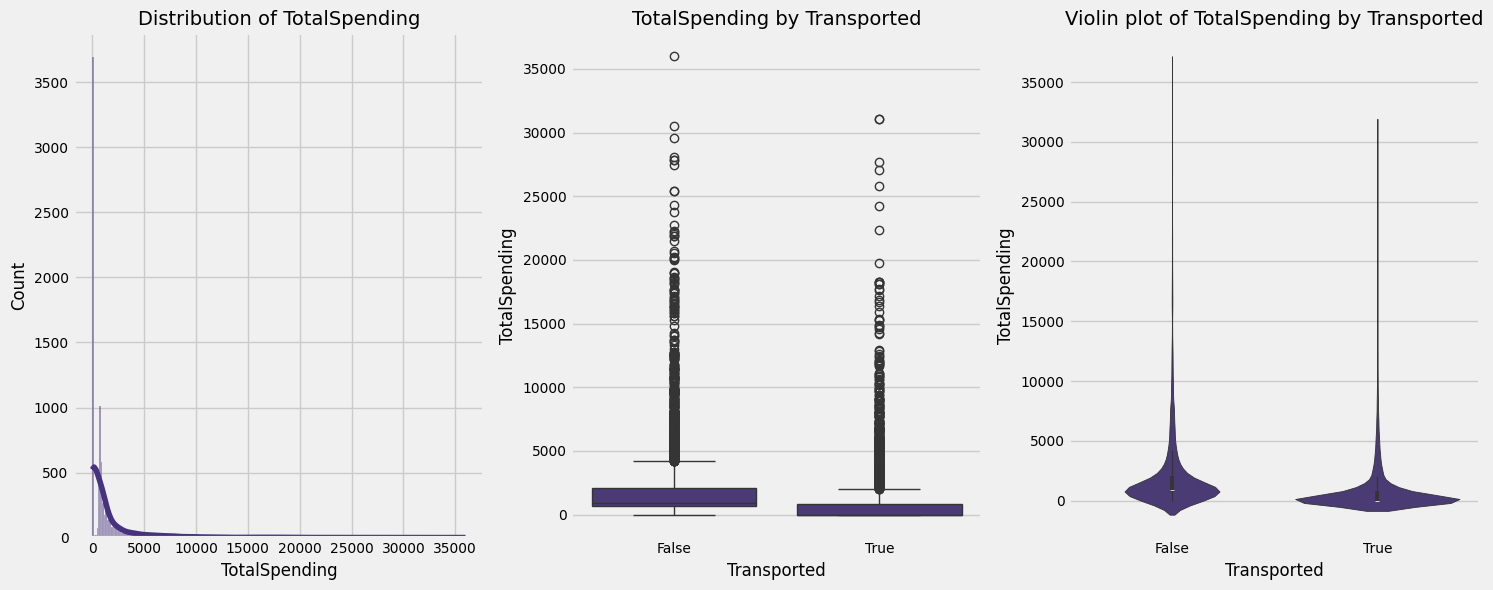

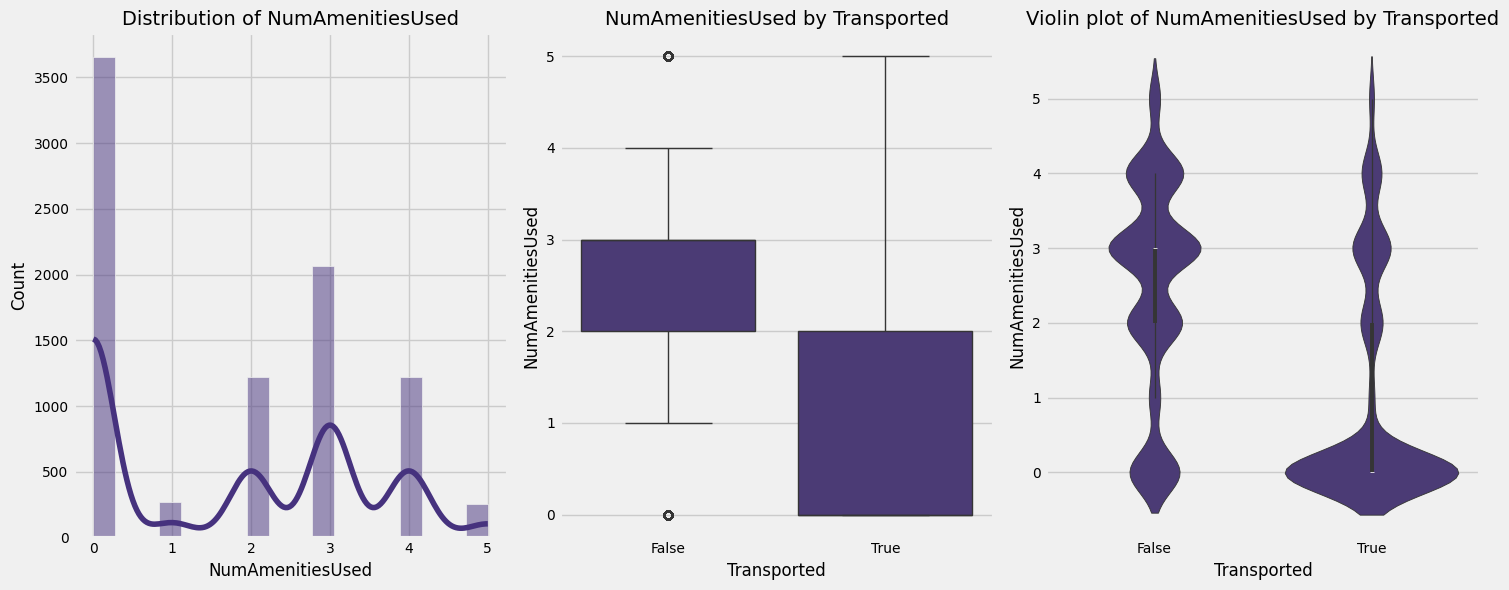


Analyzing correlations...


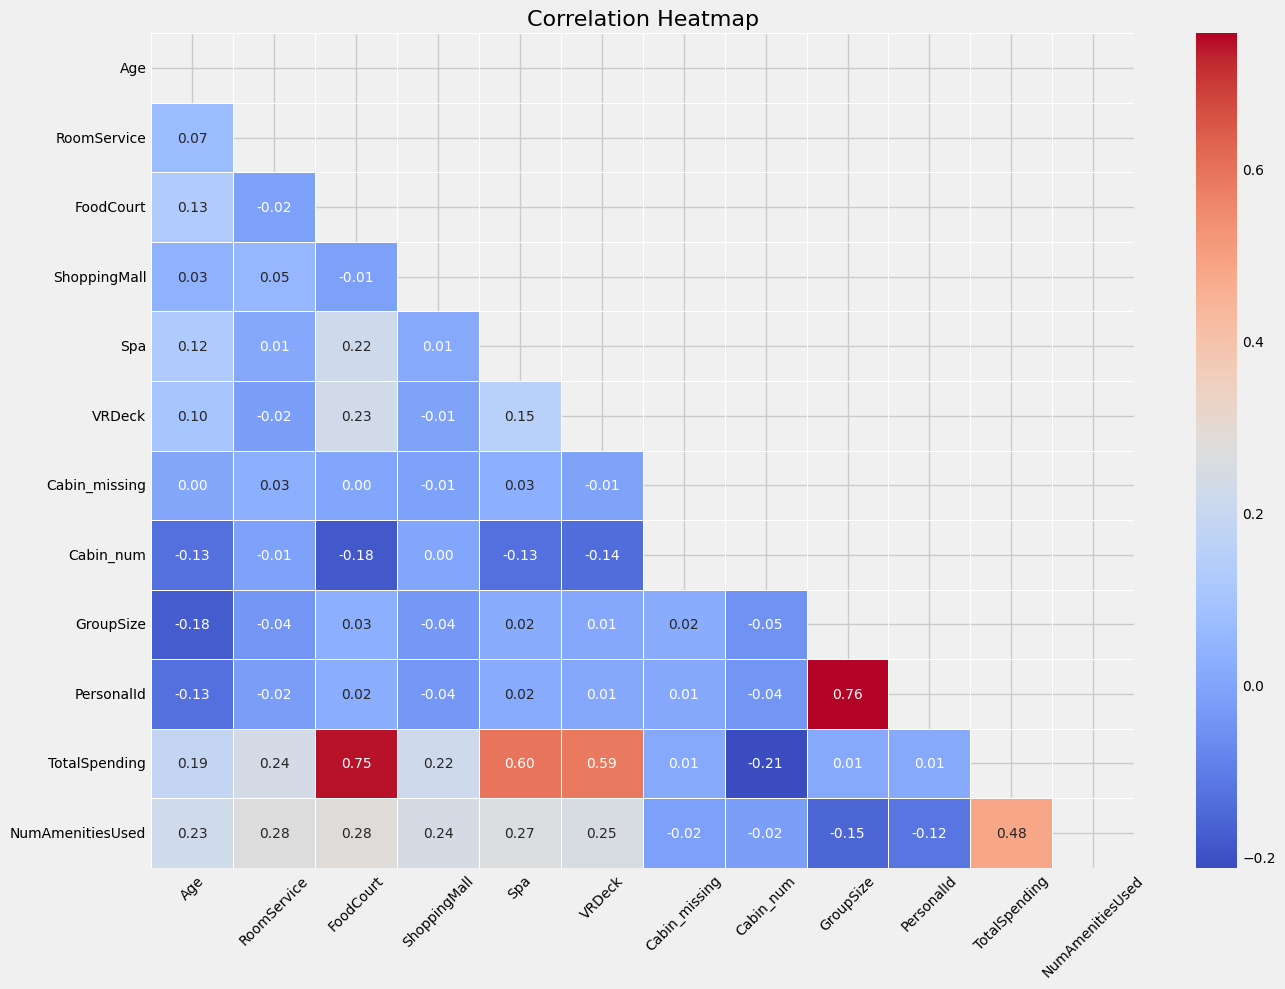

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Cabin_missing', 'Cabin_num', 'GroupSize', 'PersonalId',
       'TotalSpending', 'NumAmenitiesUsed'],
      dtype='object')
                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   

                VRDeck  Cabin_missing  Cabin_num  GroupSize  PersonalId  \
Age           0.101007       0.003390  -0.132255  -0.179102   -0.132756   
RoomService  -0.019581       0.026772  -0.008986  -0.040777   -0.022571   
FoodCourt     0.227995       0.000343  -0.183429   0.032632    0.023391   
ShoppingMall -0.007322      -0.010420   0.001727 

KeyError: 'Transported'

In [13]:
# run the EDA pipeline on the training data
train_df_processed = run_eda_pipeline(df=train_df)

In [ ]:
# display the head of this processed dataset
train_df_processed.head()